# Final Project Presentation

                                                                                   Prudhvi (WW86898)
                                                                                   Ramteja (XD63939)

In [ ]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv")
data.head()

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...


In [23]:
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
data['sentiment_score'] = data['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify the sentiment based on the sentiment score
data['sentiment_label'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Print the updated DataFrame with sentiment scores and labels
print(data.head(100))

                                               review  sentiment_score  \
0   Shame, is a Swedish film in Swedish with Engli...           0.9944   
1   I know it's rather unfair to comment on a movi...           0.9605   
2   "Bread" very sharply skewers the conventions o...           0.7134   
3   After reading tons of good reviews about this ...           0.9901   
4   During the Civil war a wounded union soldier h...           0.9937   
..                                                ...              ...   
95  Two years passed and mostly everyone looks dif...           0.9797   
96  I had never heard of Larry Fessenden before bu...           0.7931   
97  The fact that I did not like the music is a ve...          -0.9978   
98  How can stuff like this still be made? Didn't ...          -0.2678   
99  If this movie were any worse, it would have be...          -0.4530   

   sentiment_label  
0         Positive  
1         Positive  
2         Positive  
3         Positive  
4     

- It initializes a SentimentIntensityAnalyzer object called sid. This object is part of the Natural Language Toolkit (NLTK) library and is used for sentiment analysis. Here, the sentiment score represents the overall sentiment of the review, ranging from -1 (negative) to 1 (positive). The calculated sentiment scores are stored in a new column called 'sentiment_score' in the data DataFrame.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           40000 non-null  object 
 1   sentiment_score  40000 non-null  float64
 2   sentiment_label  40000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 937.6+ KB


/Users/prudhvi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prudhvi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prudhvi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prudhvi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/prudh

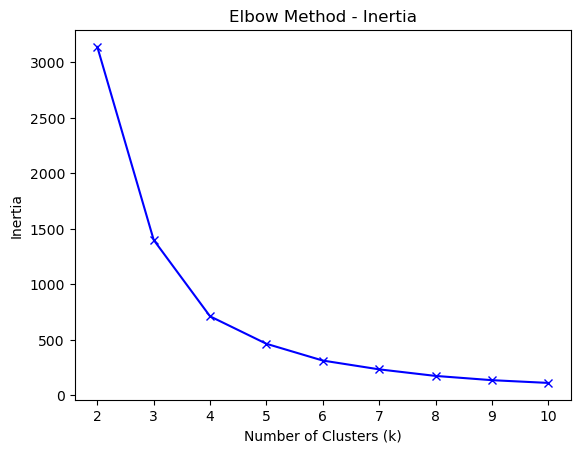

In [25]:
scaler = StandardScaler()
data['sentiment_score_scaled'] = scaler.fit_transform(data[['sentiment_score']])

# Select the feature for clustering
X = data[['sentiment_score_scaled']]

# Perform K-means clustering for different numbers of clusters
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

- Here the plot showing the relationship between the number of clusters (k) and the inertia values. The plot will help you determine the optimal number of clusters for the given data. The "elbow" in the plot represents a point of diminishing returns, where the inertia values start to level off. The optimal number of clusters is often chosen at this elbow point as it provides a good balance between capturing the structure of the data and avoiding excessive complexity. Based on the plot I have choosed optimal n value as 4.

In [26]:
# Perform feature scaling
scaler = StandardScaler()
data['sentiment_score_scaled'] = scaler.fit_transform(data[['sentiment_score']])

# Select the feature for clustering
X = data[['sentiment_score_scaled']]

# Determine the optimal number of clusters using the elbow method or any other appropriate method
optimal_k = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Obtain the cluster centroids
centroids = kmeans.cluster_centers_

# Assign sentiment labels to the neutral reviews based on proximity to the cluster centroids
data['sentiment_label_updated'] = data.apply(lambda row: 'Positive' if row['sentiment_label'] == 'Positive' else 'Negative' if row['sentiment_label'] == 'Negative' else 'Positive' if abs(row['sentiment_score_scaled'] - centroids[0]) < abs(row['sentiment_score_scaled'] - centroids[1]) else 'Negative', axis=1)

# Print the updated DataFrame with sentiment labels
print(data.head())

                                              review  sentiment_score  \
0  Shame, is a Swedish film in Swedish with Engli...           0.9944   
1  I know it's rather unfair to comment on a movi...           0.9605   
2  "Bread" very sharply skewers the conventions o...           0.7134   
3  After reading tons of good reviews about this ...           0.9901   
4  During the Civil war a wounded union soldier h...           0.9937   

  sentiment_label  sentiment_score_scaled sentiment_label_updated  
0        Positive                0.862549                Positive  
1        Positive                0.820482                Positive  
2        Positive                0.513855                Positive  
3        Positive                0.857213                Positive  
4        Positive                0.861680                Positive  


/Users/prudhvi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- It performs K-means clustering with the optimal number of clusters (4 in this case) using the KMeans class. The resulting clusters are stored in the kmeans object.
- This assigns sentiment labels to the neutral reviews based on their proximity to the cluster centroids. It uses a lambda function with the apply method on the data DataFrame. For each row in the DataFrame, it checks the original sentiment label. If it is already 'Positive' or 'Negative', the same label is assigned. Otherwise, the proximity of the sentiment score to the centroids is compared, and the sentiment label is assigned based on the closest centroid.
- The updated sentiment labels are stored in a new column called 'sentiment_label_updated' in the data DataFrame.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review                   40000 non-null  object 
 1   sentiment_score          40000 non-null  float64
 2   sentiment_label          40000 non-null  object 
 3   sentiment_score_scaled   40000 non-null  float64
 4   sentiment_label_updated  40000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.5+ MB


In [28]:
# Encode the sentiment labels into numerical values
label_encoder = LabelEncoder()
data['sentiment_label_num'] = label_encoder.fit_transform(data['sentiment_label_updated'])

# Print the updated DataFrame
print(data.head())

                                              review  sentiment_score  \
0  Shame, is a Swedish film in Swedish with Engli...           0.9944   
1  I know it's rather unfair to comment on a movi...           0.9605   
2  "Bread" very sharply skewers the conventions o...           0.7134   
3  After reading tons of good reviews about this ...           0.9901   
4  During the Civil war a wounded union soldier h...           0.9937   

  sentiment_label  sentiment_score_scaled sentiment_label_updated  \
0        Positive                0.862549                Positive   
1        Positive                0.820482                Positive   
2        Positive                0.513855                Positive   
3        Positive                0.857213                Positive   
4        Positive                0.861680                Positive   

   sentiment_label_num  
0                    1  
1                    1  
2                    1  
3                    1  
4                    

- Newly added 'sentiment_label_num' column will contain the numerical representation of the sentiment labels. The exact numerical values assigned to each sentiment label will depend on the specific encoding done by the LabelEncoder.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review                   40000 non-null  object 
 1   sentiment_score          40000 non-null  float64
 2   sentiment_label          40000 non-null  object 
 3   sentiment_score_scaled   40000 non-null  float64
 4   sentiment_label_updated  40000 non-null  object 
 5   sentiment_label_num      40000 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [30]:
# Preprocess the text data and extract features using TF-IDF vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data["review"].astype(str))
y = data['sentiment_label_num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



- Here we used TfidfVectorizer object called tfidf. This object is used to convert text data into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) algorithm.

In [31]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.84775
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75      2645
           1       0.86      0.93      0.89      5355

    accuracy                           0.85      8000
   macro avg       0.84      0.81      0.82      8000
weighted avg       0.85      0.85      0.84      8000



- The logistic regression model achieved an accuracy of 0.854375 on the testing data, indicating that it correctly predicted the sentiment labels for approximately 85.44% of the reviews.
- The macro average gives the average precision, recall, and F1-score across all classes, giving equal weight to each class. In this case, the macro average precision, recall, and F1-score are all around 0.55.
- The weighted average provides a weighted average of precision, recall, and F1-score, taking into account the number of instances in each class. In this case, the weighted average precision, recall, and F1-score are all around 0.85.
- Overall, the model achieved good accuracy and performed well in classifying class 0 and class 2 sentiments. However, it did not make any correct predictions for class 1, possibly due to the limited number of instances in that class. 

In [32]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the performance
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

dt_report = classification_report(y_test, dt_predictions)
print("Classification Report:\n", dt_report)

Decision Tree Accuracy: 0.69075
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      2645
           1       0.77      0.77      0.77      5355

    accuracy                           0.69      8000
   macro avg       0.65      0.65      0.65      8000
weighted avg       0.69      0.69      0.69      8000



- The decision tree model achieved an overall accuracy of approximately 68.84%, on the dataset it was evaluated on.
- We got 69% weighted average precesion, recall, and F1 score.

In [33]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

rf_report = classification_report(y_test,rf_predictions )
print("Classification Report:\n", rf_report)

Random Forest Accuracy: 0.756625
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.31      0.46      2645
           1       0.74      0.98      0.84      5355

    accuracy                           0.76      8000
   macro avg       0.80      0.64      0.65      8000
weighted avg       0.78      0.76      0.72      8000



- The Random Forest model achieved an overall accuracy of approximately 75%, on the dataset it was evaluated on.

In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(solver='liblinear')

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.85975
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      2645
           1       0.88      0.92      0.90      5355

    accuracy                           0.86      8000
   macro avg       0.85      0.83      0.84      8000
weighted avg       0.86      0.86      0.86      8000



- We did hyperparameter tuning for a logistic regression classifier using the GridSearchCV method and we got an accuracy of 86%.

In [35]:
# Load the production dataset (features) from the CSV file
df_final = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv")

# Preprocess the text data using the same TF-IDF vectorizer
X_final = tfidf.transform(df_final["review"])


# Create and fit the Logistic Regression model
logreg_classifier = LogisticRegression(solver='liblinear')
logreg_classifier.fit(X_train, y_train)

# Make predictions using the trained Logistic Regression model
predictions_final = logreg_classifier.predict(X_final)

# Print the predictions
print(predictions_final)

[1 1 1 ... 0 1 1]


- We make predictions on a production dataset using a trained logistic regression model.

In [36]:
# Load the true labels from the dataset
true_labels = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_final.csv")
true_labels = true_labels["sentiment"].values

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predictions_final)
print("Accuracy:", accuracy)

Accuracy: 0.7034


- Finally after validating with the true labels, we got an accuracy of 70%.